In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def profiling_report(df):
    # !pip install pandas-profiling
    from pandas_profiling import ProfileReport
    ProfileReport(df)
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

    #helps to make a full report
    profiling_report(df)

In [2]:
waterPoint = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\lagos-chapter-water-availability\src\data\raw_data\Water_Point_Data_Exchange__WPDx-Basic_.csv')

In [3]:
waterPoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89717 entries, 0 to 89716
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_id                    89717 non-null  int64  
 1   #source                   89717 non-null  object 
 2   #lat_deg                  89717 non-null  float64
 3   #lon_deg                  89717 non-null  float64
 4   #report_date              89717 non-null  object 
 5   #status_id                89717 non-null  object 
 6   #water_source             89713 non-null  object 
 7   #water_source_clean       89711 non-null  object 
 8   #water_tech_clean         88487 non-null  object 
 9   #water_tech               89692 non-null  object 
 10  #facility_type            89711 non-null  object 
 11  #country_name             89717 non-null  object 
 12  #adm1                     89656 non-null  object 
 13  #adm2                     89638 non-null  object 
 14  #adm3 

In [7]:
waterPoint.isnull().sum()

row_id                          0
#source                         0
#lat_deg                        0
#lon_deg                        0
#report_date                    0
#status_id                      0
#water_source                   4
#water_source_clean             6
#water_tech_clean            1230
#water_tech                    25
#facility_type                  6
#country_name                   0
#adm1                          61
#adm2                          79
#adm3                       89716
#install_year               40222
#installer                  89692
#rehab_year                 89717
#rehabilitator              89717
#management                 27486
#pay                           82
#status                        83
#fecal_coliform_value       89698
#fecal_coliform_presence    89717
#subjective_quality            66
#activity_id                89649
#scheme_id                  89716
#notes                         72
#photo_lnk                   2466
#orig_lnk     

### Removing Null Values

In [16]:
columns = waterPoint.columns

#  I had dropped all those columns which has more than 40% of null values 
for i in range(len(columns)):
    if((waterPoint[columns[i]].isnull().sum() / waterPoint.shape[0] > 0.4)):
        waterPoint.drop([columns[i]] , axis=1 , inplace=True)

In [18]:
waterPoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89717 entries, 0 to 89716
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_id                    89717 non-null  int64  
 1   #source                   89717 non-null  object 
 2   #lat_deg                  89717 non-null  float64
 3   #lon_deg                  89717 non-null  float64
 4   #report_date              89717 non-null  object 
 5   #status_id                89717 non-null  object 
 6   #water_source             89713 non-null  object 
 7   #water_source_clean       89711 non-null  object 
 8   #water_tech_clean         88487 non-null  object 
 9   #water_tech               89692 non-null  object 
 10  #facility_type            89711 non-null  object 
 11  #country_name             89717 non-null  object 
 12  #adm1                     89656 non-null  object 
 13  #adm2                     89638 non-null  object 
 14  #manag

### EDA

#### Numeric Feature


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
row_id,89717.0,186299.967097,60623.049703,59279.000000,145078.000000,185883.000000,226773.000000,522785.0
#lat_deg,89717.0,9.552467,2.493615,-1.998507,7.494055,9.490658,11.999297,56.0
#lon_deg,89717.0,7.499461,2.222145,-1.398100,5.515158,7.872831,9.088648,53.0
count,89717.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0


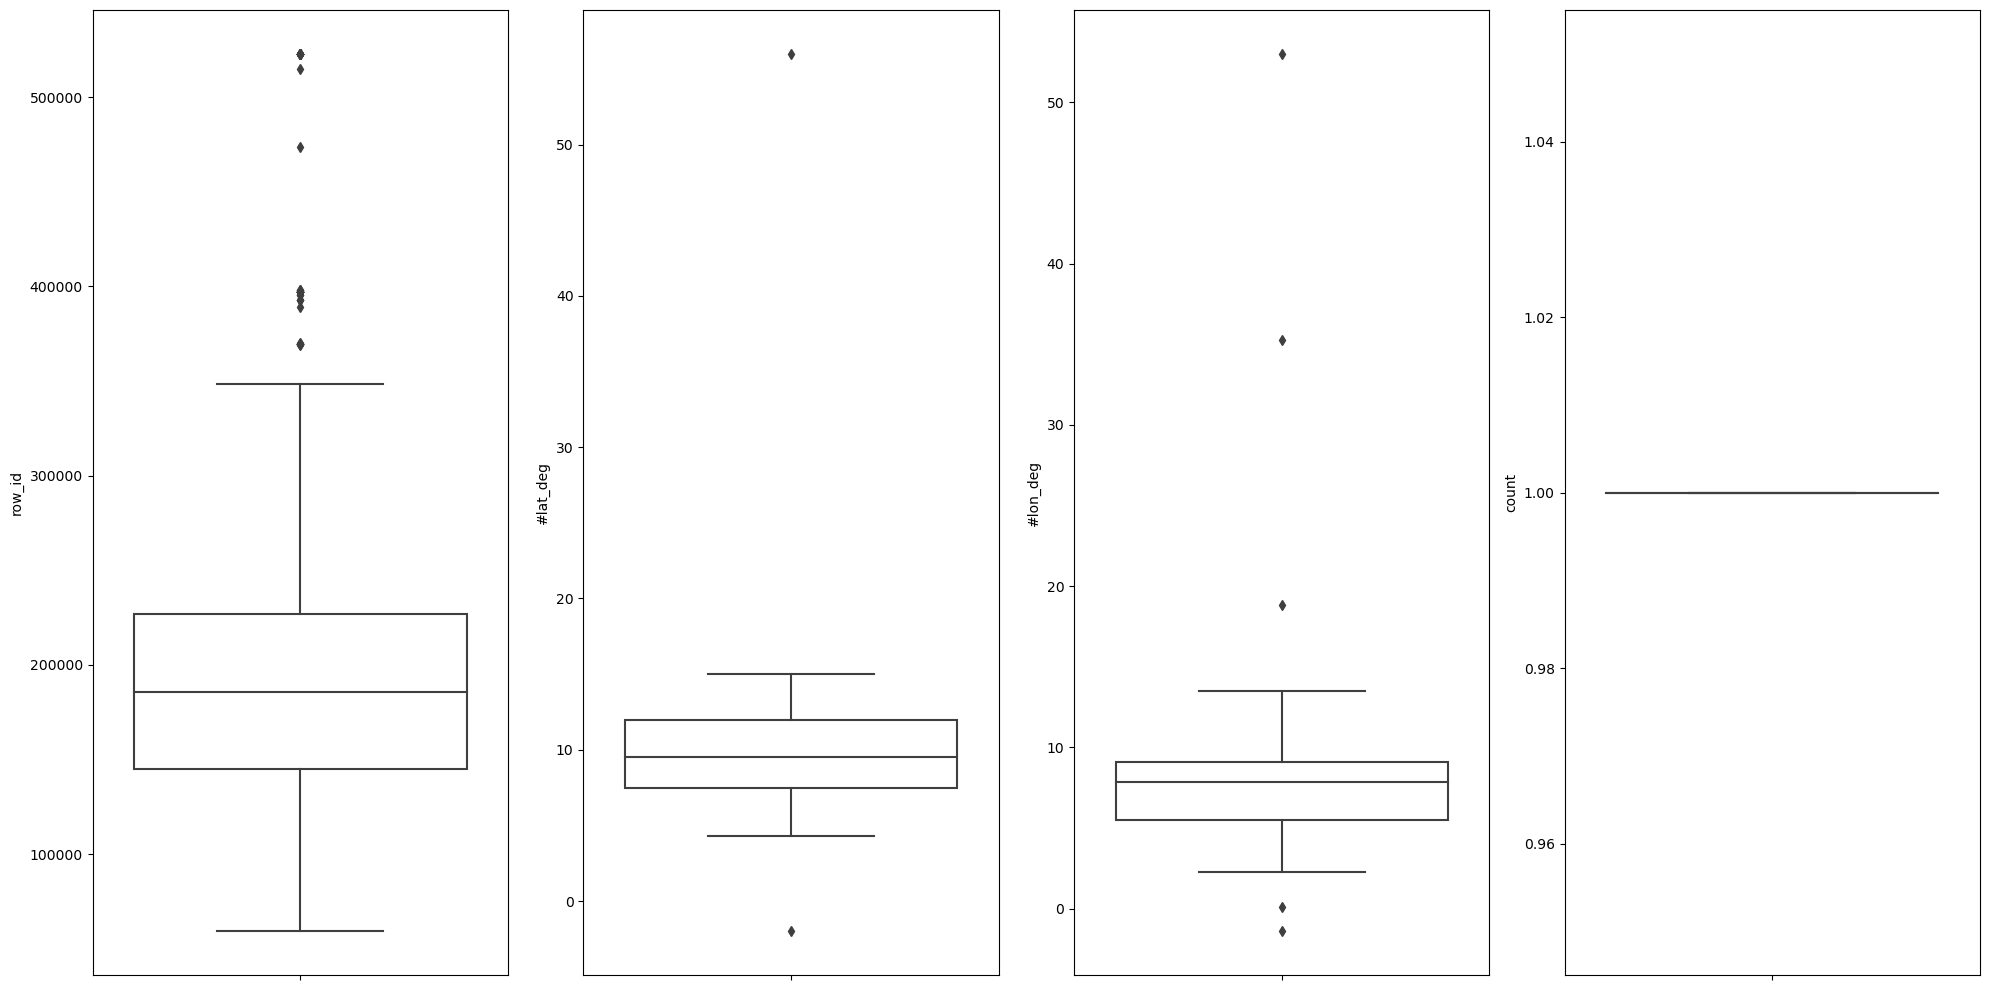


To check pairwise joint distribution of numeric data


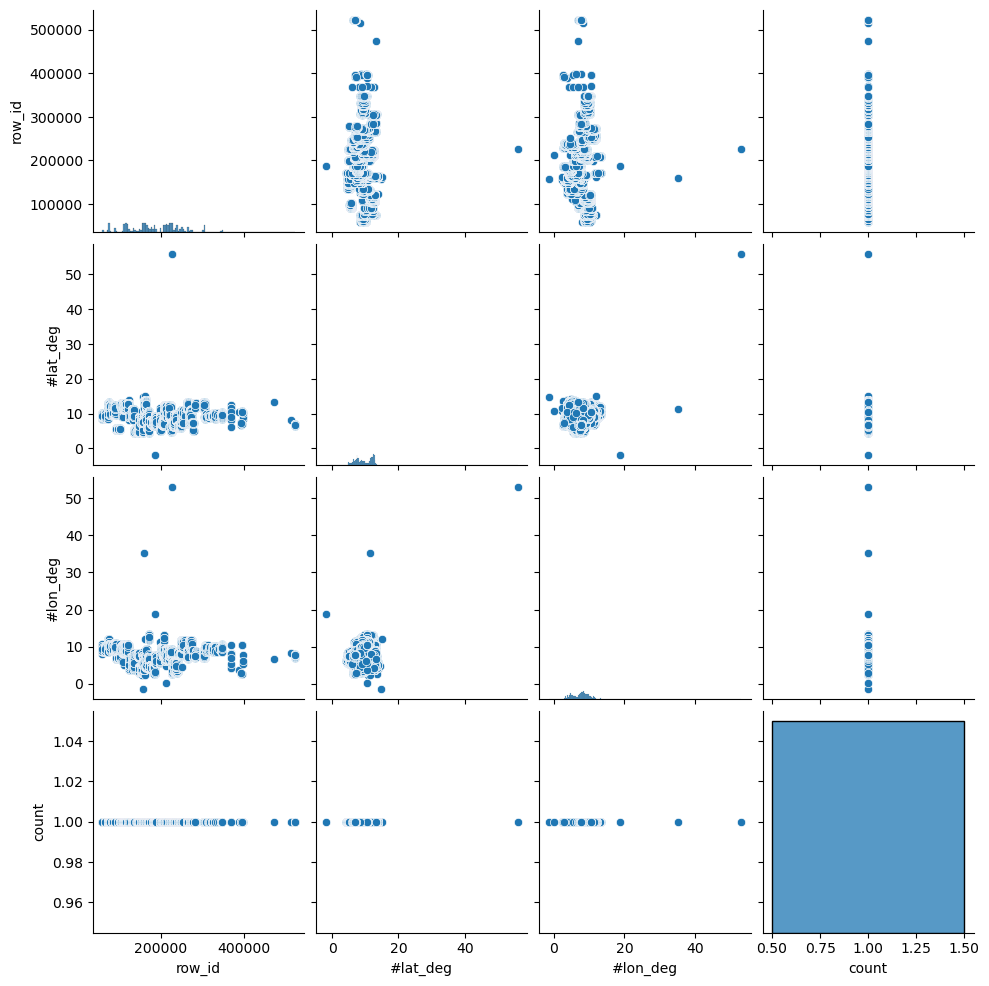

In [19]:
numeric_eda(waterPoint)

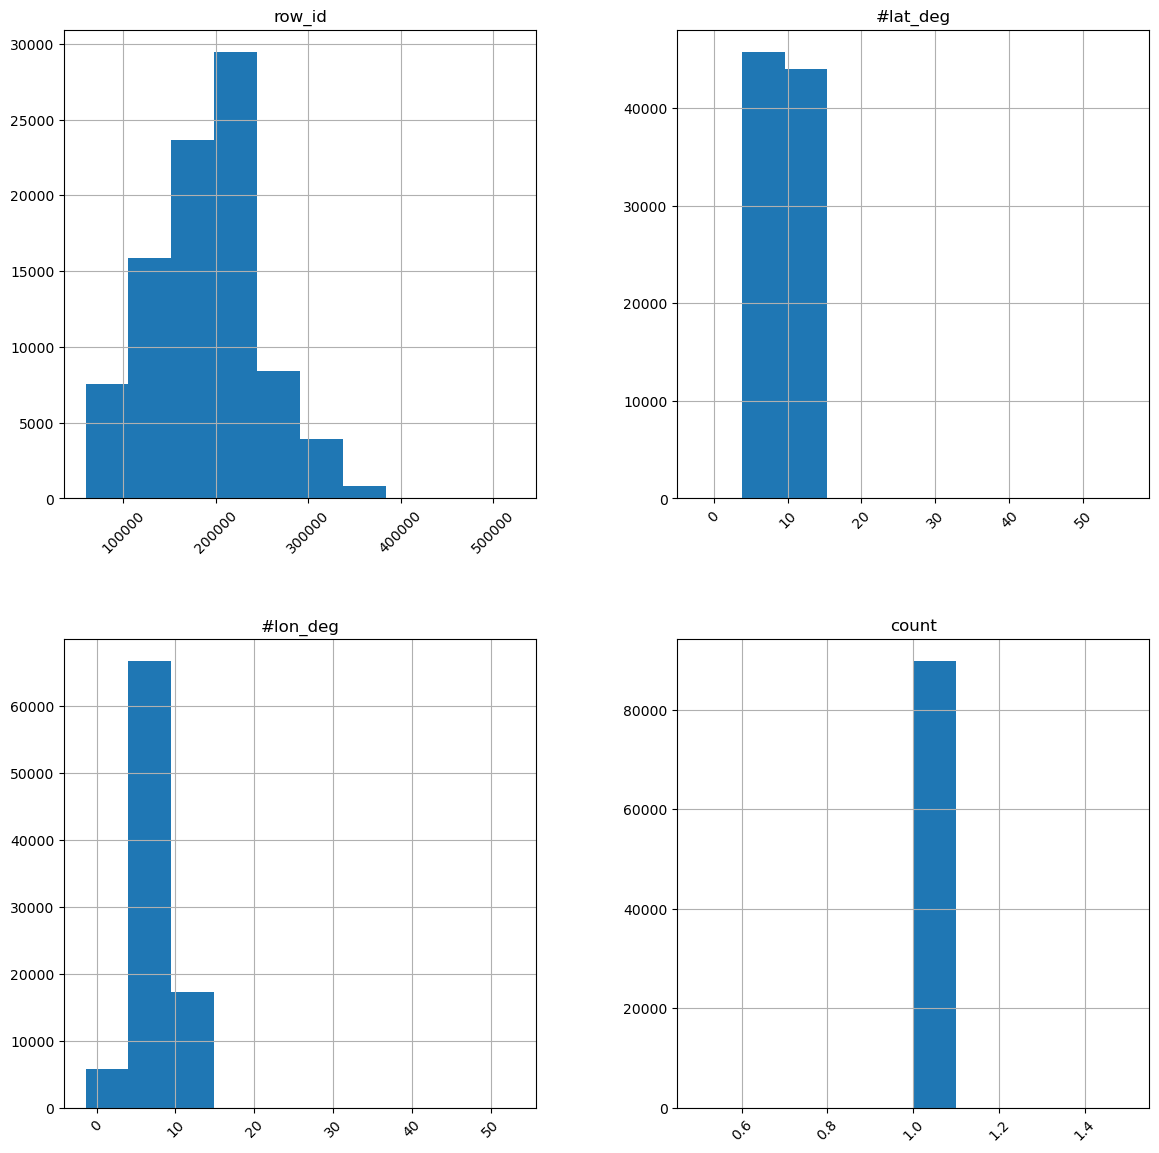

In [24]:
waterPoint.hist(figsize=(14,14), xrot=45)
plt.show()

NoneType

#### Categorical Features

In [25]:
categorical_eda(waterPoint)


To check: 
Unique count of non-numeric data

#source                         9
#report_date                  360
#status_id                      3
#water_source                  14
#water_source_clean             8
#water_tech_clean               9
#water_tech                   270
#facility_type                  2
#country_name                   5
#adm1                          41
#adm2                         754
#management                    13
#pay                           48
#status                       896
#subjective_quality             6
#notes                      55222
#photo_lnk                  87246
#data_lnk                      10
public_data_source             10
#converted                      4
#country_id                     5
lat_lon_deg                 89248
created_timestamp              10
updated                        10
New Georeferenced Column    89248
clean_country_id                8
clean_country_name              8
clean_adm1                     50
cl

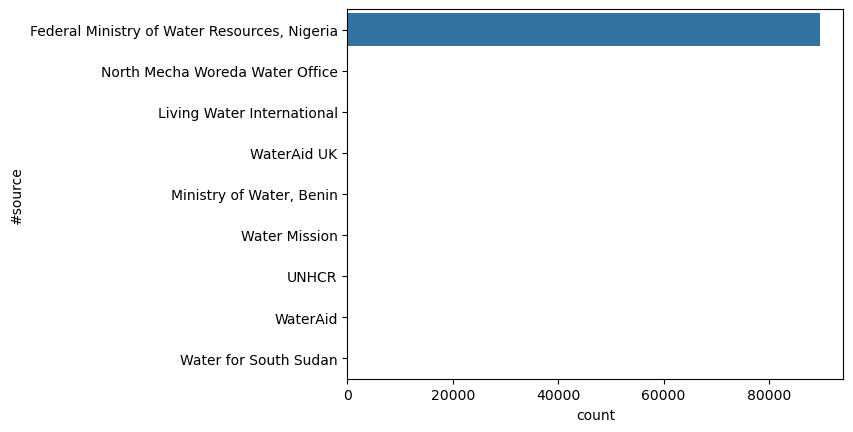

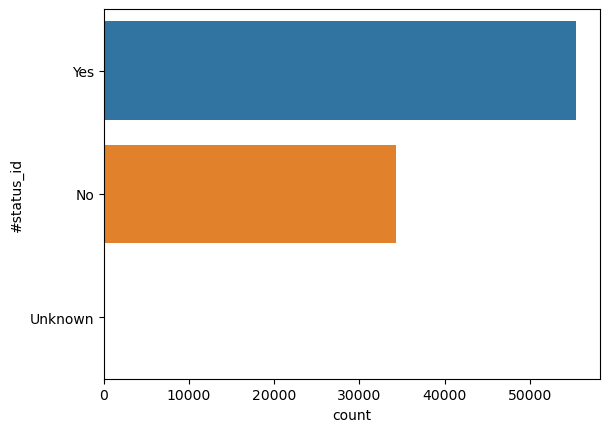

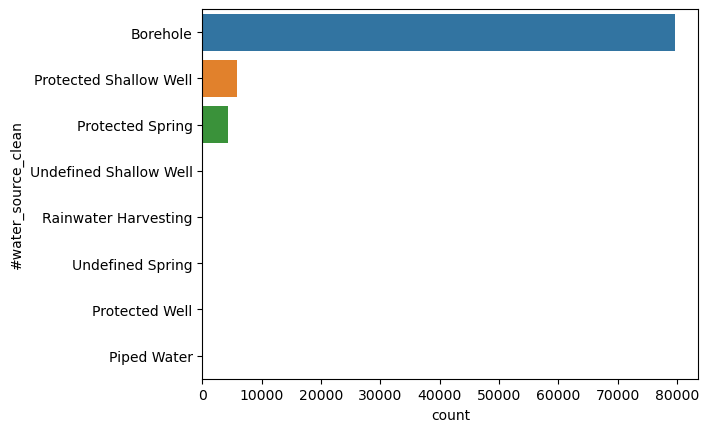

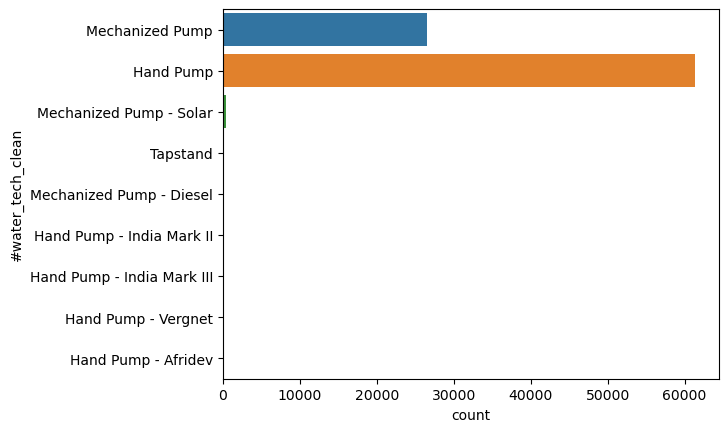

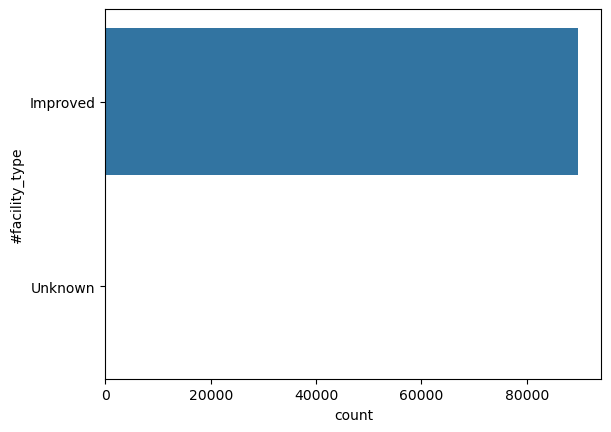

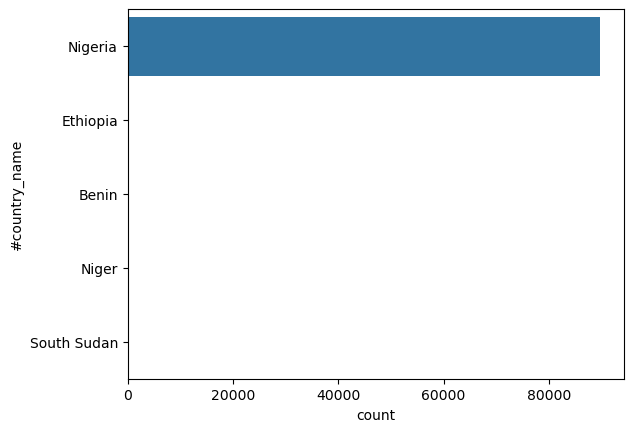

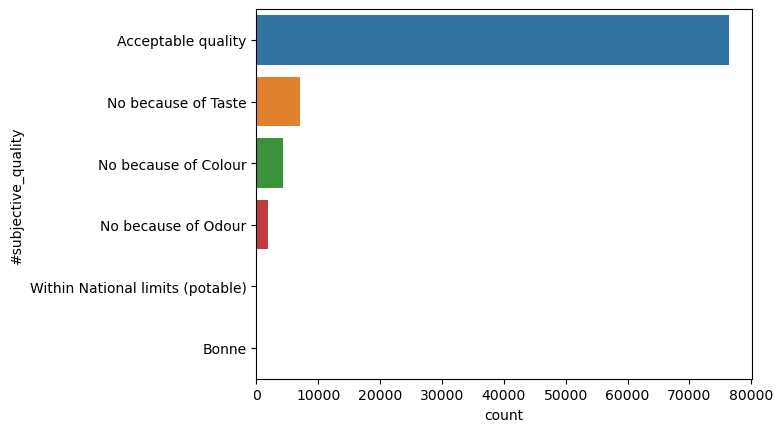

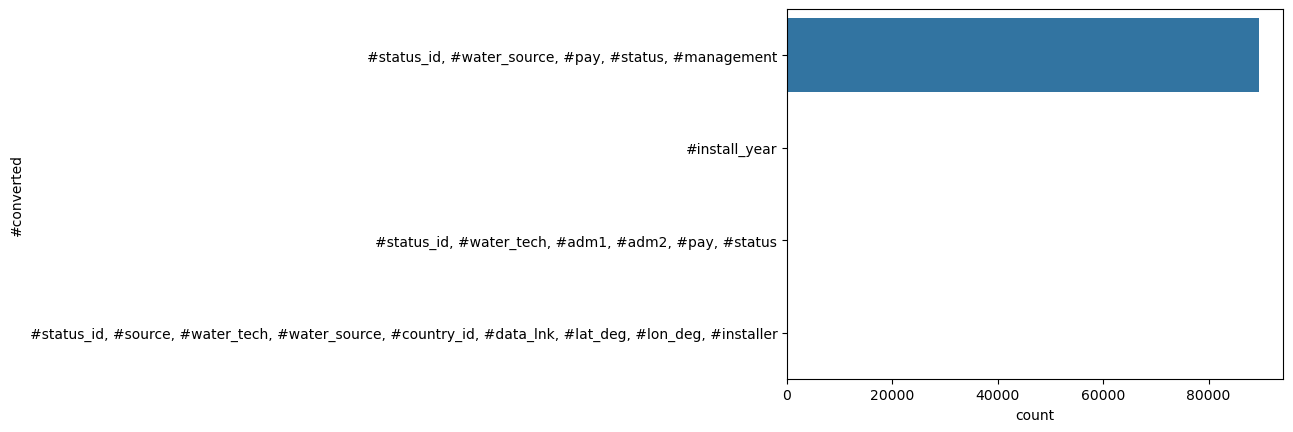

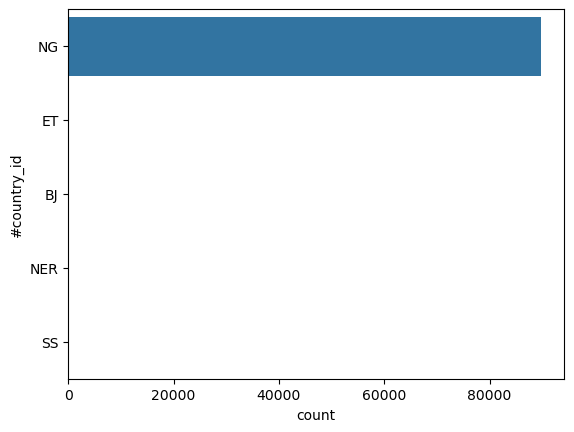

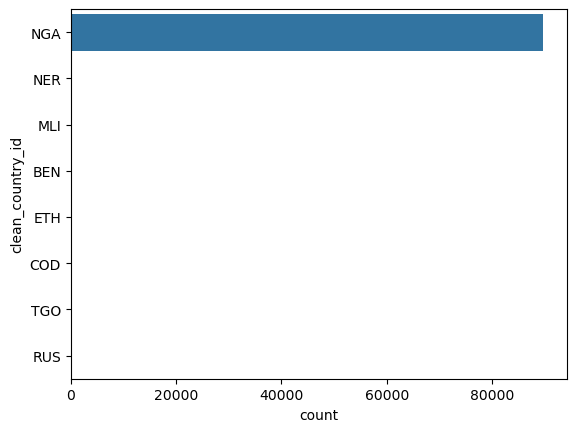

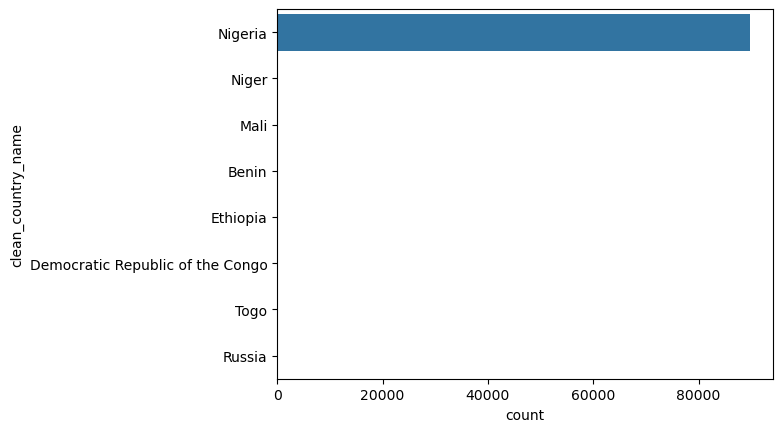

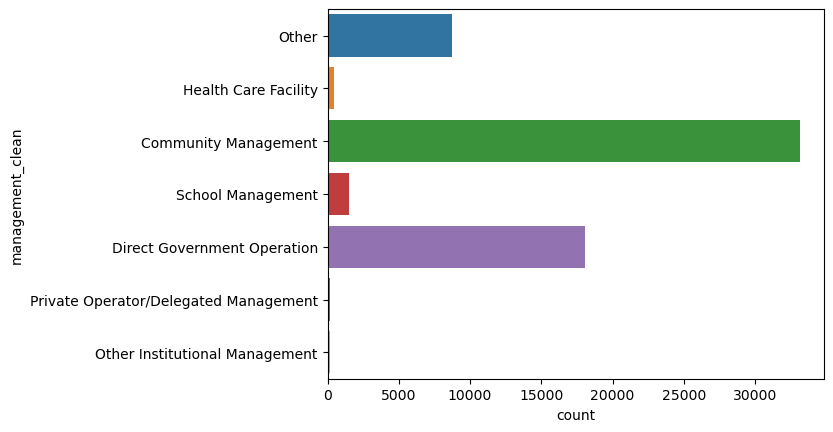

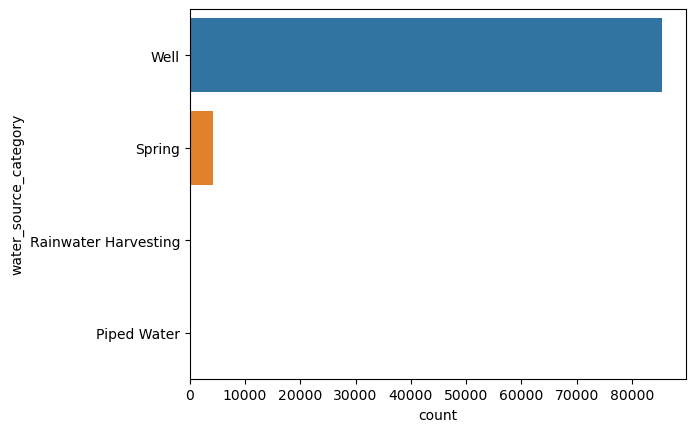

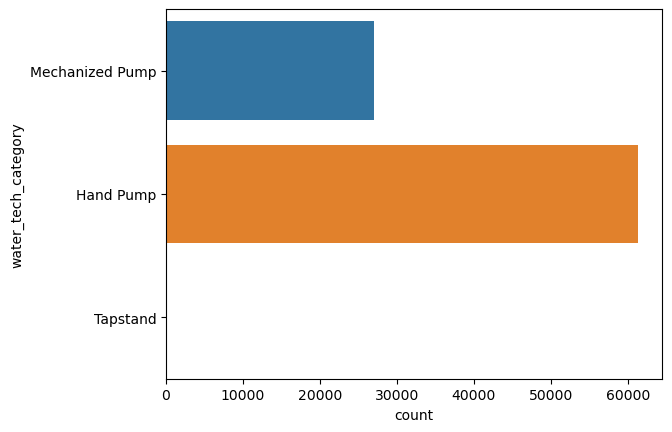

In [28]:
for column in waterPoint.select_dtypes(include='object'):
    if waterPoint[column].nunique() < 10:
        sns.countplot(y=column, data=waterPoint)
        plt.show()

In [34]:
categorical_features = list(waterPoint.select_dtypes("int8").columns)

In [35]:
for i in categorical_features:
    print(f'{i}\n{np.round((waterPoint[i].value_counts() / waterPoint[i].value_counts().sum()) * 100,2)}')

### Correlation

In [32]:
corrs = waterPoint.corr()
corrs

,row_id,#lat_deg,#lon_deg,count
row_id,1.000000,-0.123927,-0.057219,NaN
#lat_deg,-0.123927,1.000000,0.360279,NaN
#lon_deg,-0.057219,0.360279,1.000000,NaN
count,NaN,NaN,NaN,NaN


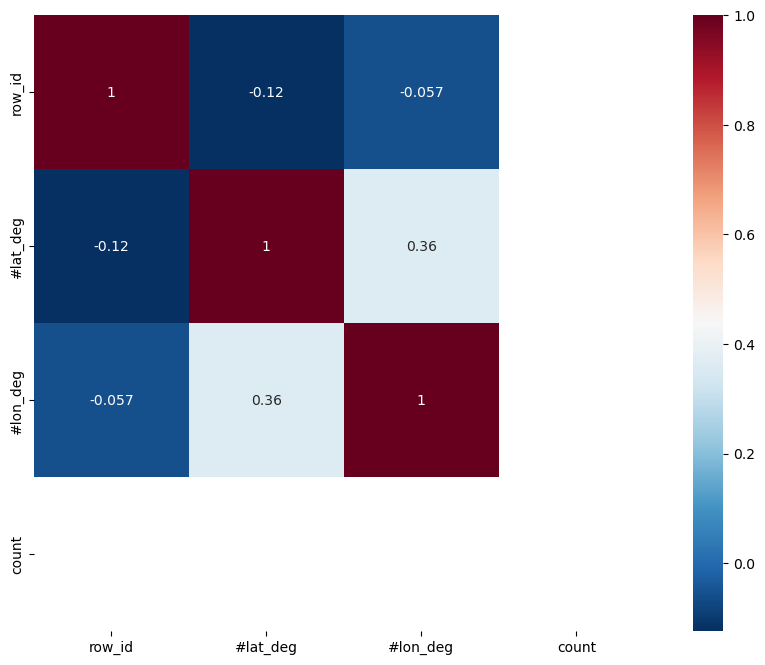

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()